<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/Modelos/STEP_2_Feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Estos datos deberan cargarse con el df limpio al que se ha realizado SMOTE
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv", delimiter=',', encoding='latin1')

In [4]:
def evaluacion(y_true, y_pred, y_pred_proba):
    """
    Realiza operaciones de métricas de evaluación sobre los resultados del entrenamiento.

    Parámetros:
        - y_true: Etiquetas verdaderas.
        - y_pred: Etiquetas predichas.
        - y_pred_proba: Probabilidades predichas.

    Retorna:
        - Accuracy del modelo
        - Precision_score
        - Recall_score
        - F1_score
        - Matriz de confusión
        - Calculo de ROC-AUC
        - Gráficas de métricas:
            * Curva ROC
            * Curva de precisión
            * Matriz de Confusión
            * Histograma de Probabilidad
    """

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Precisión
    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)

    # F1-score
    f1 = f1_score(y_true, y_pred)
    print("F1-score:", f1)

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calcula la ROC-AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

    # Calcula la curva ROC.
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

    # Calcula la curva de precisión y recuperación
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    # Gráficos
    plt.figure(figsize=(7, 7))

    # Curva ROC
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    # Curva de precisión y recuperación
    plt.subplot(2, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    # Matriz de confusión
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Matriz de Confusión')

    # Histograma de probabilidades predichas
    plt.subplot(2, 2, 4)
    plt.hist(y_pred_proba, bins=20, color='orange', alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Histograma de probabilidades')
    plt.tight_layout()
    plt.show()

###FEATURE IMPORTANCE
Varios métodos

In [5]:
# Dividir en train y test
X = df.drop(columns=['target'])
y = df['target']

# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos normalizados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
def train_models(X_train, X_test, y_train, y_test):
    """
    Entrena diferentes modelos de clasificación dados los datos de entrenamiento y prueba.

    Parámetros:
        - X_train: Features de entrenamiento.
        - X_test: Features de prueba.
        - y_train: Etiquetas de entrenamiento.
        - y_test: Etiquetas de prueba.

    Retorna:
        - model_results: Diccionario con los modelos entrenados y resultados de evaluación.
    """

    # Entrenar árbol de decisión
    tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]

    # Entrenar clasificador de Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_rf = rf_classifier.predict(X_test)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Entrenar Logistic Regression
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train, y_train)
    y_pred_lr = lr_classifier.predict(X_test)
    y_pred_proba_lr = lr_classifier.predict_proba(X_test)[:, 1]

    # Diccionario de modelos
    model_results = {
        'Decision Tree': {'model': tree, 'y_pred': y_pred_tree, 'y_pred_proba': y_pred_proba_tree},
        'Random Forest': {'model': rf_classifier, 'y_pred': y_pred_rf, 'y_pred_proba': y_pred_proba_rf},
        'Logistic Regression': {'model': lr_classifier, 'y_pred': y_pred_lr, 'y_pred_proba': y_pred_proba_lr}
    }

    # Evaluación
    for name, model_data in model_results.items():
        y_true = y_test
        y_pred = model_data['y_pred']
        y_pred_proba = model_data['y_pred_proba']

        # Llamar a la función de evaluación
        evaluacion(y_true, y_pred, y_pred_proba)

        # Gráfico Random Forest y Decision Tree
        if name in ['Decision Tree', 'Random Forest']:
            feature_importance = model_data['model'].feature_importances_
            sorted_indices = np.argsort(feature_importance)[::-1]  # Ordenar índices
            sorted_features = np.array(X.columns)[sorted_indices]
            sorted_importance = feature_importance[sorted_indices]
            plt.figure(figsize=(7, 7))
            plt.barh(sorted_features, sorted_importance, color='skyblue')
            plt.xlabel('Importancia')
            plt.ylabel('Característica')
            plt.title(f'Importancia de las características para {name}')
            plt.gca().invert_yaxis()
            plt.show()
        elif name == 'Logistic Regression':
            feature_importance = lr_classifier.coef_[0]
            sorted_indices = np.argsort(np.abs(feature_importance))[::-1]  # Ordenar índices
            sorted_features = np.array(X.columns)[sorted_indices]
            sorted_importance = feature_importance[sorted_indices]
            plt.figure(figsize=(7, 7))
            plt.barh(sorted_features, sorted_importance, color='skyblue')
            plt.xlabel('Importancia')
            plt.ylabel('Característica')
            plt.title(f'Importancia de las características para {name}')
            plt.gca().invert_yaxis()
            plt.show()

    return model_results

Accuracy: 0.9752781211372065
Precision: 0.9904882688649335
Recall: 0.9600491702519975
F1-score: 0.9750312109862671
Confusion Matrix:
 [[1594   15]
 [  65 1562]]
ROC-AUC Score: 0.9936592836163207


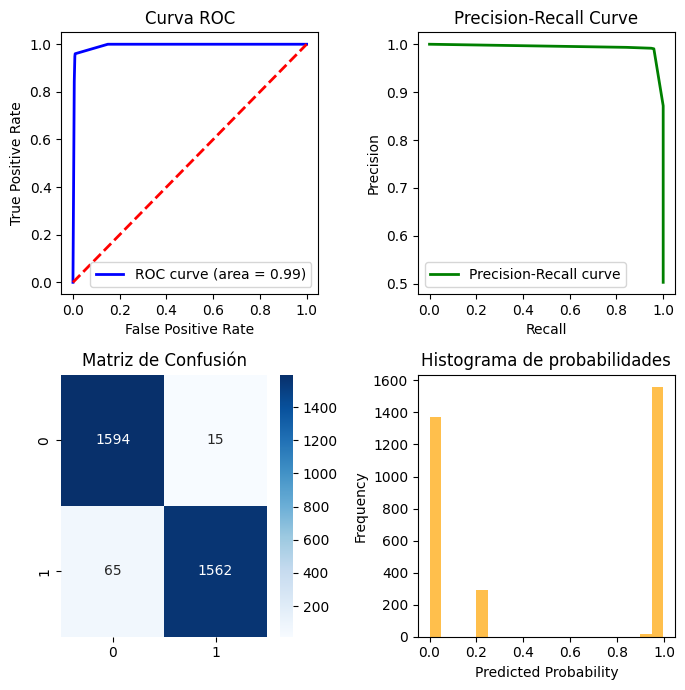

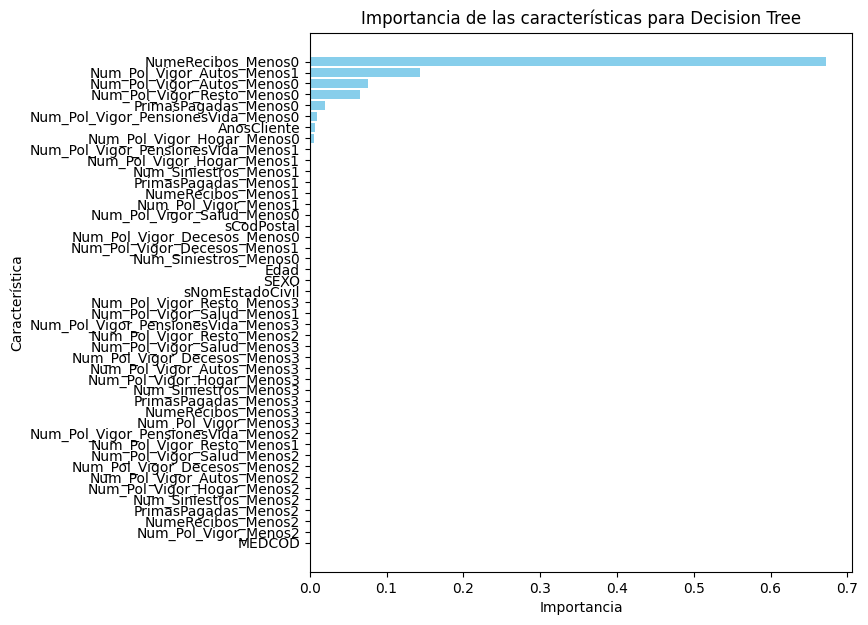

Accuracy: 0.9990729295426453
Precision: 1.0
Recall: 0.9981561155500922
F1-score: 0.9990772070132267
Confusion Matrix:
 [[1609    0]
 [   3 1624]]
ROC-AUC Score: 0.9999898771622286


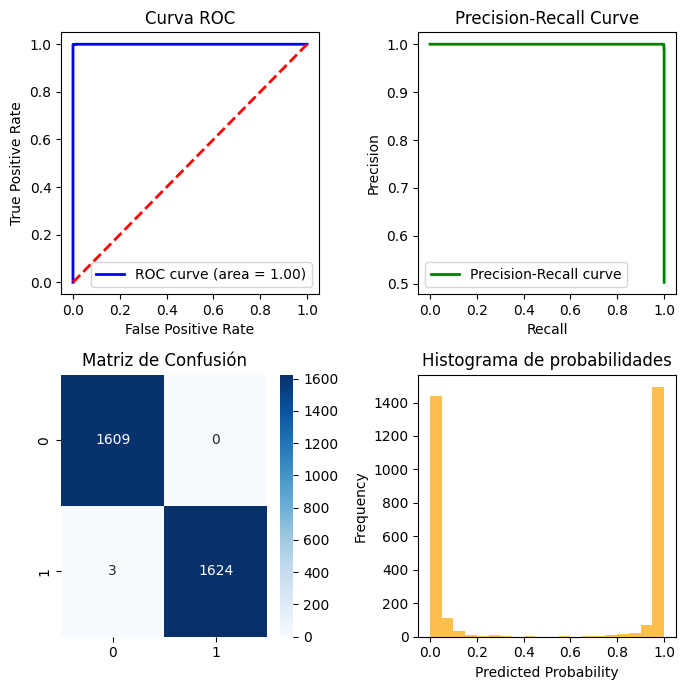

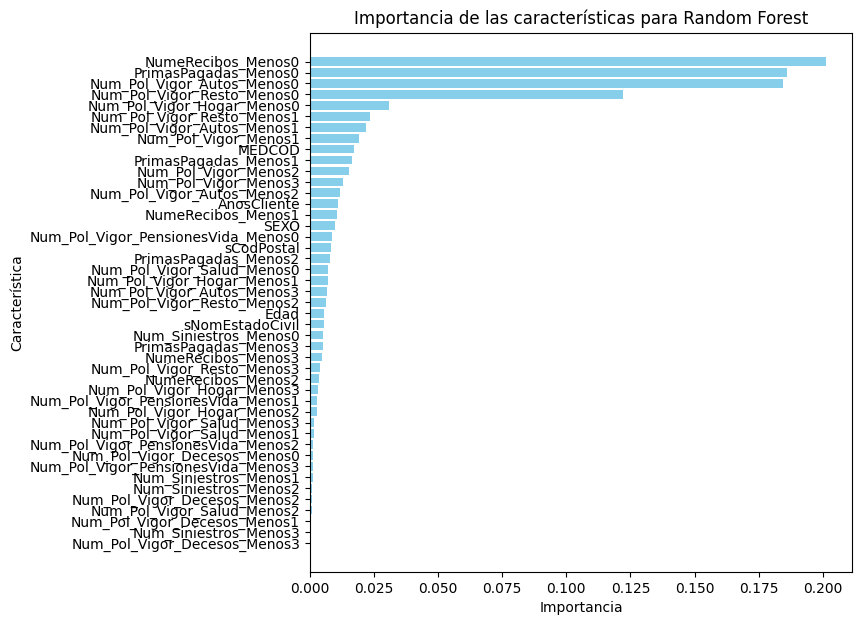

Accuracy: 0.9996909765142151
Precision: 0.9993857493857494
Recall: 1.0
F1-score: 0.9996927803379416
Confusion Matrix:
 [[1608    1]
 [   0 1627]]
ROC-AUC Score: 0.9998479664364899


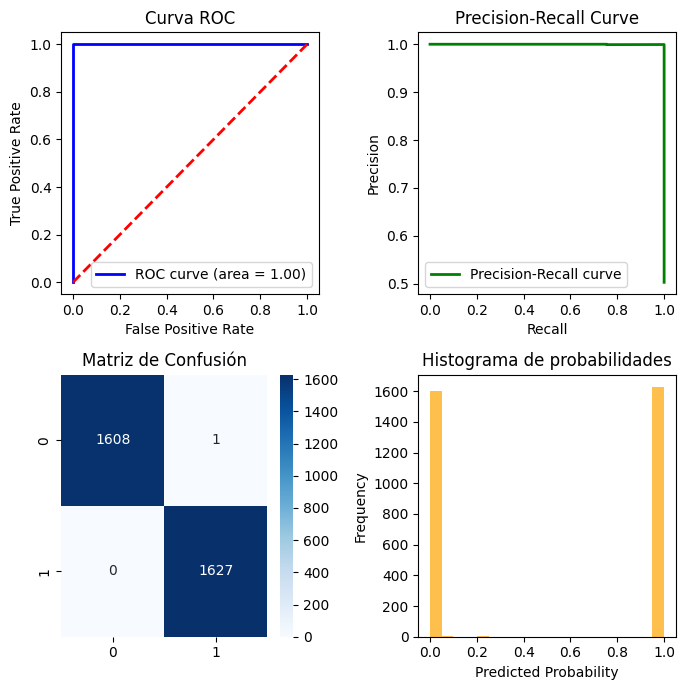

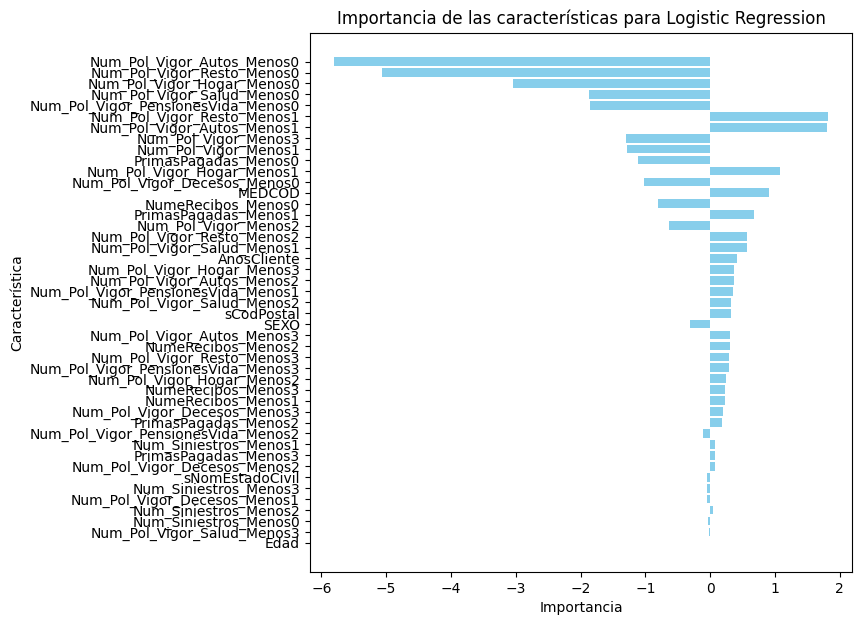

In [7]:
trained_models = train_models(X_train, X_test, y_train, y_test)

In [8]:
df.columns

Index(['MEDCOD', 'Edad', 'AnosCliente', 'sCodPostal', 'sNomEstadoCivil',
       'SEXO', 'NumeRecibos_Menos0', 'PrimasPagadas_Menos0',
       'Num_Siniestros_Menos0', 'Num_Pol_Vigor_Hogar_Menos0',
       'Num_Pol_Vigor_Autos_Menos0', 'Num_Pol_Vigor_Decesos_Menos0',
       'Num_Pol_Vigor_Salud_Menos0', 'Num_Pol_Vigor_PensionesVida_Menos0',
       'Num_Pol_Vigor_Resto_Menos0', 'Num_Pol_Vigor_Menos1',
       'NumeRecibos_Menos1', 'PrimasPagadas_Menos1', 'Num_Siniestros_Menos1',
       'Num_Pol_Vigor_Hogar_Menos1', 'Num_Pol_Vigor_Autos_Menos1',
       'Num_Pol_Vigor_Decesos_Menos1', 'Num_Pol_Vigor_Salud_Menos1',
       'Num_Pol_Vigor_PensionesVida_Menos1', 'Num_Pol_Vigor_Resto_Menos1',
       'Num_Pol_Vigor_Menos2', 'NumeRecibos_Menos2', 'PrimasPagadas_Menos2',
       'Num_Siniestros_Menos2', 'Num_Pol_Vigor_Hogar_Menos2',
       'Num_Pol_Vigor_Autos_Menos2', 'Num_Pol_Vigor_Decesos_Menos2',
       'Num_Pol_Vigor_Salud_Menos2', 'Num_Pol_Vigor_PensionesVida_Menos2',
       'Num_Pol_Vigor_Resto

In [9]:
# Define las columnas que deseas eliminar
columnas_drop = ['NumeRecibos_Menos0',
                 'PrimasPagadas_Menos0',
                 'Num_Pol_Vigor_Hogar_Menos0',
                 'Num_Pol_Vigor_Autos_Menos0',
                 'Num_Pol_Vigor_Decesos_Menos0',
                 'Num_Pol_Vigor_Salud_Menos0',
                 'Num_Pol_Vigor_PensionesVida_Menos0',
                 'Num_Pol_Vigor_Resto_Menos0',
                 'MEDCOD']

# Elimina las columnas del DataFrame
df = df.drop(columnas_drop, axis=1)

# Dividir en train y test
X = df.drop(columns=['target'])
y = df['target']

# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos normalizados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy: 0.7126081582200248
Precision: 0.6858666666666666
Recall: 0.7904118008604795
F1-score: 0.7344374643061108
Confusion Matrix:
 [[1020  589]
 [ 341 1286]]
ROC-AUC Score: 0.7826015540274952


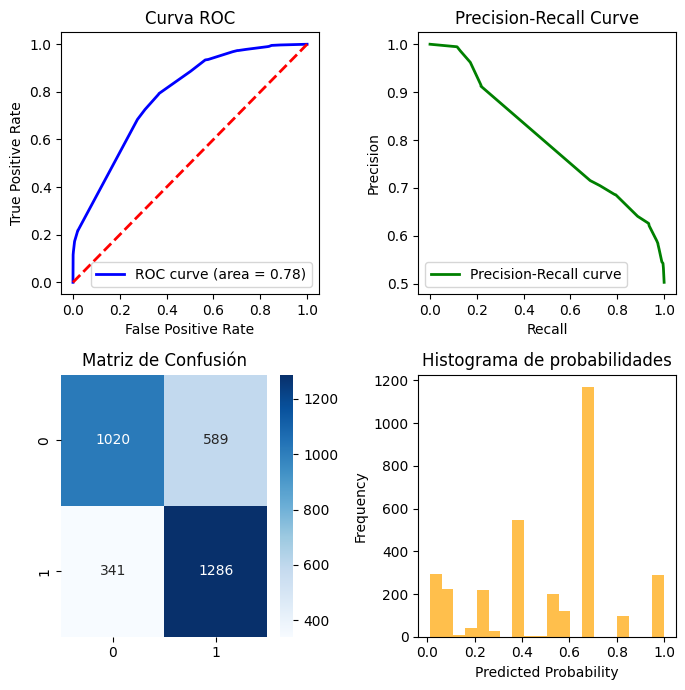

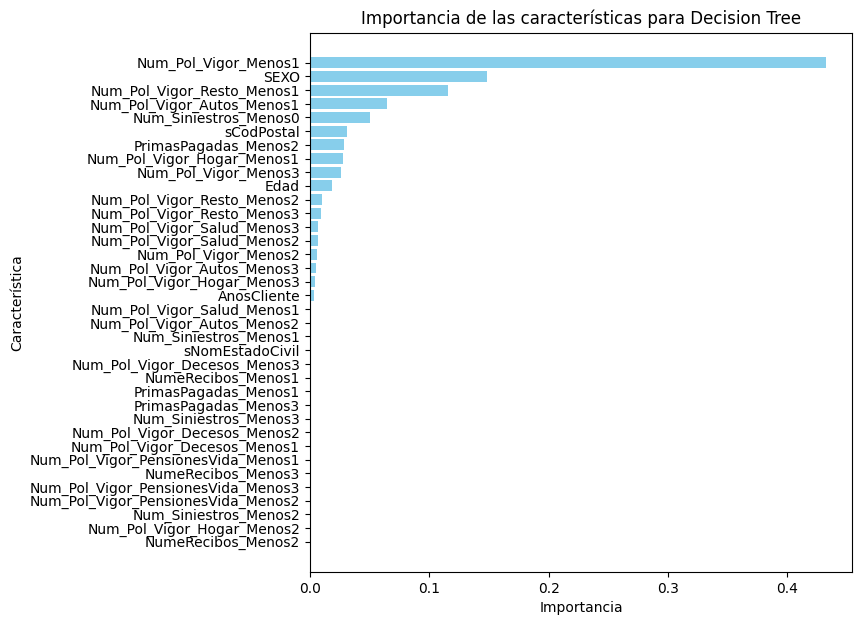

Accuracy: 0.9011124845488258
Precision: 0.9036442248301421
Recall: 0.89920098340504
F1-score: 0.9014171287738756
Confusion Matrix:
 [[1453  156]
 [ 164 1463]]
ROC-AUC Score: 0.9583596113288689


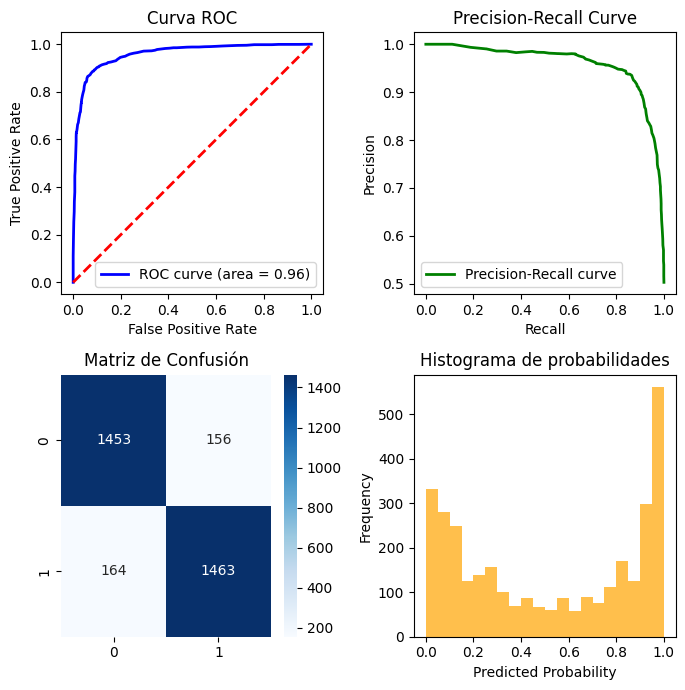

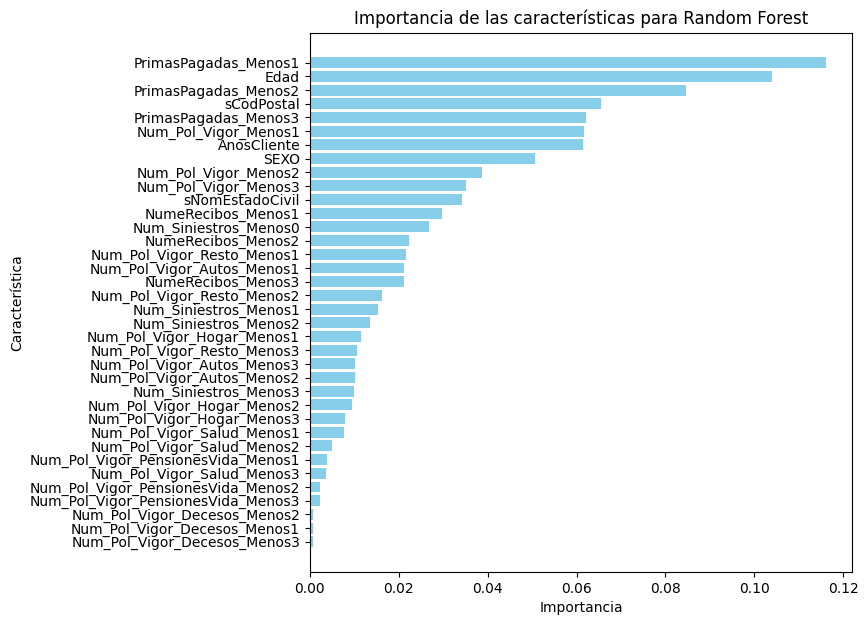

Accuracy: 0.7648331273176762
Precision: 0.7474285714285714
Recall: 0.8039336201598033
F1-score: 0.7746520580396802
Confusion Matrix:
 [[1167  442]
 [ 319 1308]]
ROC-AUC Score: 0.8550195714563479


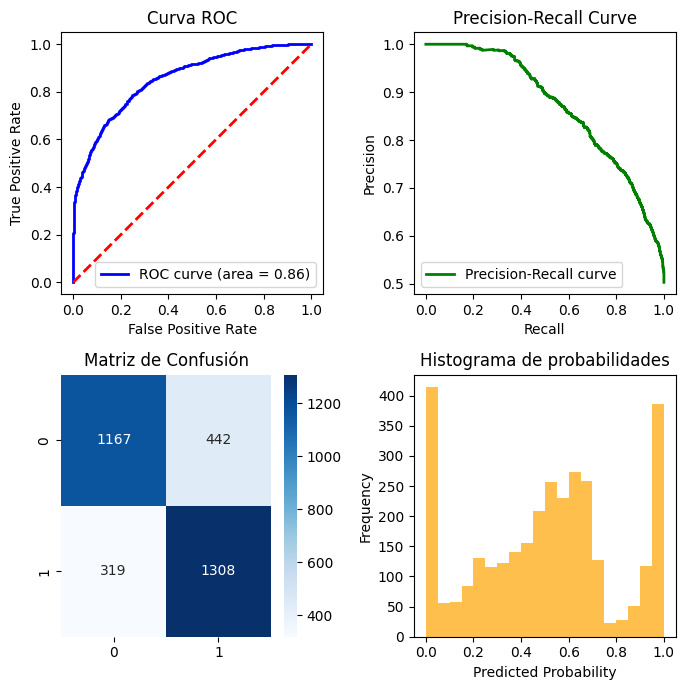

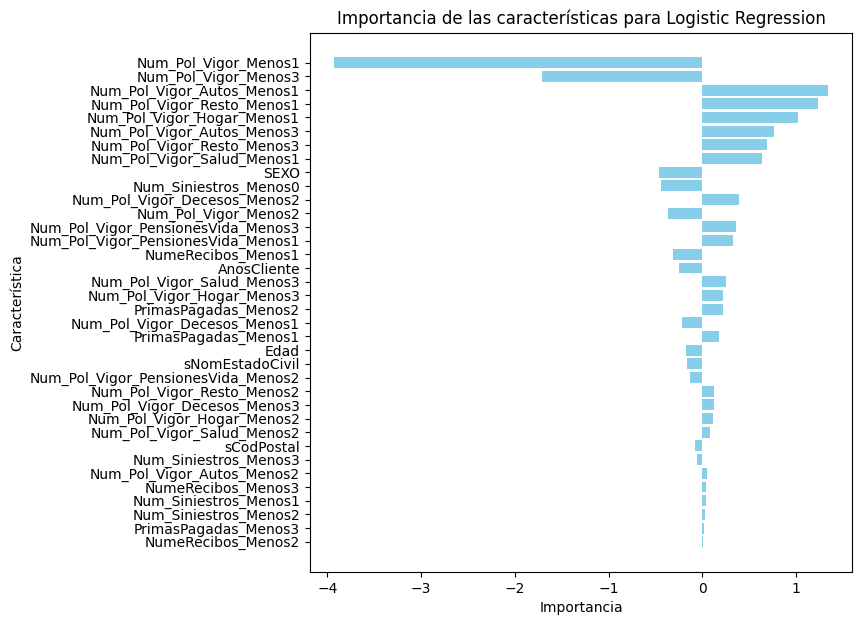

In [10]:
# Ejemplo de uso
trained_models = train_models(X_train, X_test, y_train, y_test)